# Exploratory Data Analysis

### Importing Packages and Datasets

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("dark")

In [2]:
df_global = pd.read_csv("~/Global-Analysis/Global_data.csv", encoding = "latin1")

### Data Wrangling

In [3]:
df_global.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Life Expectancy', 'Income',
       'Population', 'Continent', 'Overall Score', 'Property Rights',
       'Government Integrity', 'Judicial Effectiveness', 'Tax Burden',
       'Government Spending', 'Fiscal Health', 'Business Freedom',
       'Labor Freedom', 'Monetary Freedom', 'Trade Freedom',
       'Investment Freedom', 'Financial Freedom', 'Income Index',
       'Average years of Schooling', 'Expected years of Schooling',
       'Education Index', 'Human Development Index'],
      dtype='object')

In [4]:
df_global = df_global.drop("Unnamed: 0", axis = 1)

In [5]:
df_global = df_global.rename(columns={"Overall Score": "Economic Freedom Index"})

In [6]:
for i in range(len(df_global)):
    if df_global.loc[i,"Economic Freedom Index"] > 80:
        df_global.loc[i, "Free Market Class"] = "Free"
    elif ((df_global.loc[i,"Economic Freedom Index"] >= 70) & (df_global.loc[i,"Economic Freedom Index"] <= 79.9)):
        df_global.loc[i, "Free Market Class"] = "Mostly Free"
    elif ((df_global.loc[i,"Economic Freedom Index"] >= 60) & (df_global.loc[i,"Economic Freedom Index"] <= 69.9)):
        df_global.loc[i, "Free Market Class"] = "Moderately Free"
    elif ((df_global.loc[i,"Economic Freedom Index"] >= 50) & (df_global.loc[i,"Economic Freedom Index"] <= 59.9)):
        df_global.loc[i, "Free Market Class"] = "Mostly Unfree"
    else:
        df_global.loc[i, "Free Market Class"] = "Repressed"

In [7]:
df_global.head()

,Country,Year,Life Expectancy,Income,Population,Continent,Economic Freedom Index,Property Rights,Government Integrity,Judicial Effectiveness,...,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Income Index,Average years of Schooling,Expected years of Schooling,Education Index,Human Development Index,Free Market Class
0,Afghanistan,1995,53.3,1030,18100000,Asia,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.393,1.9,4.2,0.179,0.331,Repressed
1,Albania,1995,74.6,4130,3110000,Europe,49.7,50.0,10.0,0.0,...,22.1,59.0,70.0,50.0,0.584,8.0,10.2,0.550,0.637,Repressed
2,Algeria,1995,72.9,9340,28800000,Africa,55.7,50.0,50.0,0.0,...,59.2,54.2,50.0,50.0,0.654,4.7,9.8,0.431,0.595,Mostly Unfree
3,Angola,1995,49.5,3410,13900000,Africa,27.4,30.0,30.0,0.0,...,0.0,25.0,30.0,30.0,0.533,0.0,3.9,0.000,0.000,Repressed
4,Argentina,1995,73.3,14000,34800000,The Americas,68.0,70.0,50.0,0.0,...,61.1,58.4,70.0,50.0,0.777,8.3,13.3,0.648,0.741,Moderately Free


In [8]:
df_global["Year"].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019], dtype=int64)

In [9]:
df_world = df_global.copy()
df_world.to_csv("~/Global-Analysis/World_data.csv")

### Scatter Plot Function

In [10]:
def scatter(df, var1, var2, year):
    df = df[df["Year"] == year]
    plt.figure(figsize = (16,8))
    sns.scatterplot(x = var1, y = var2, data = df, hue = "Continent", palette = 'deep')
    plt.title("%s vs %s in the year %d"%(var2, var1, year), fontsize = 15)
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

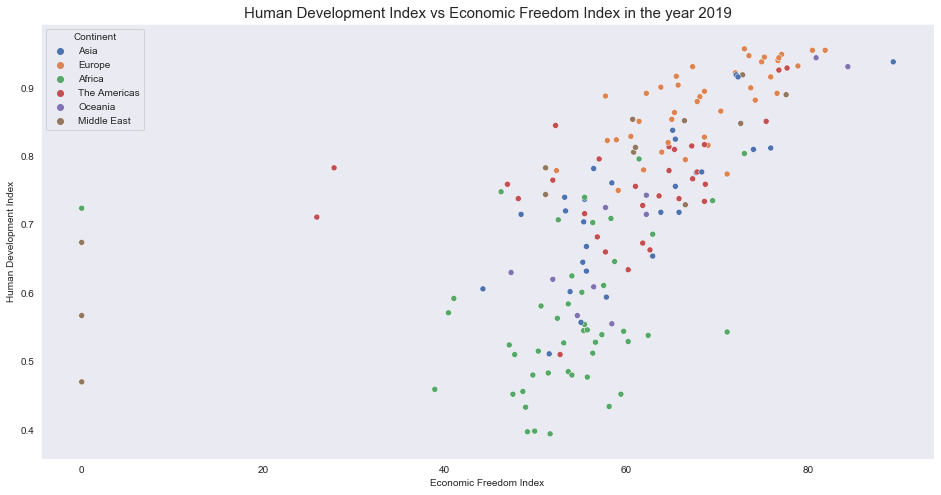

In [11]:
scatter(df_global, "Economic Freedom Index", "Human Development Index", 2019)

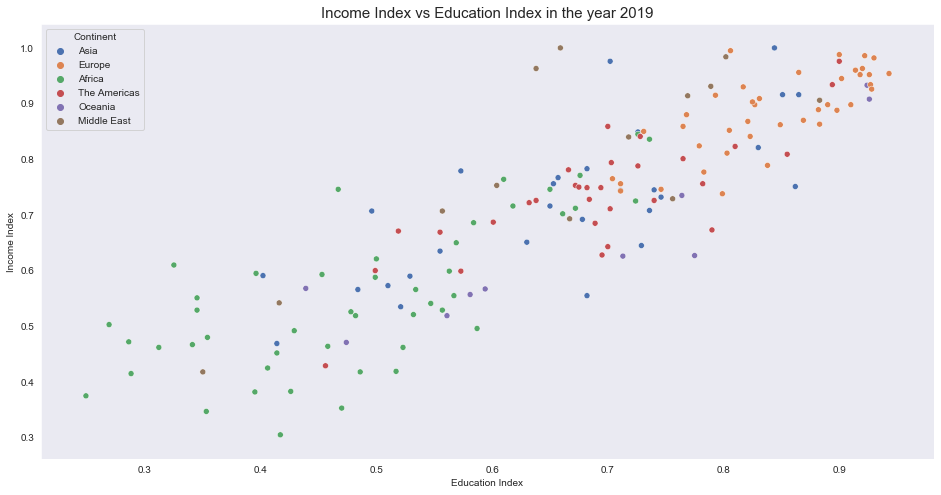

In [12]:
scatter(df_global, "Education Index", "Income Index", 2019)

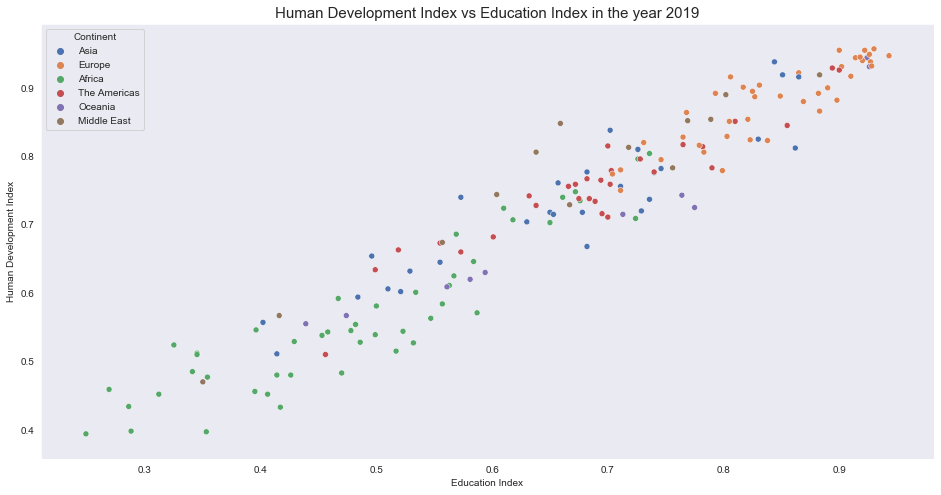

In [13]:
scatter(df_global, "Education Index", "Human Development Index", 2019)

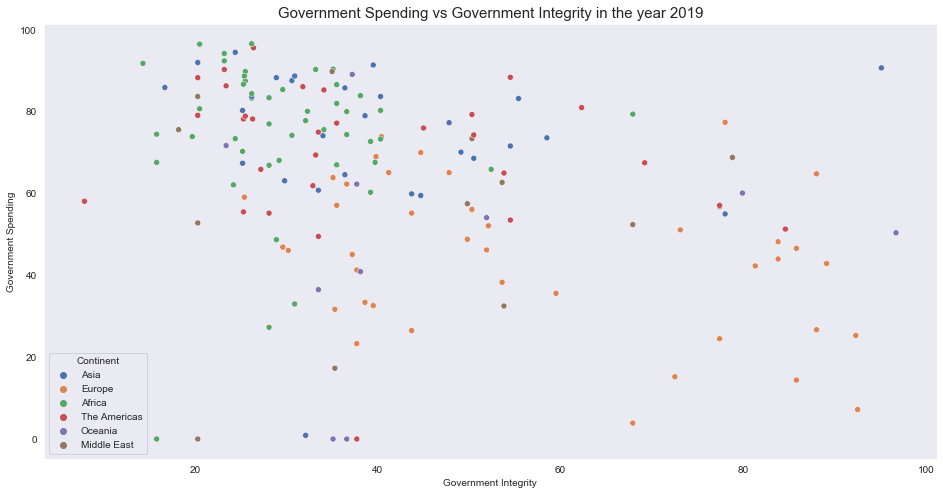

In [14]:
scatter(df_global, "Government Integrity", "Government Spending", 2019)

### KDE Plot Function

In [15]:
def kdechart(df, var1):
    plt.figure(figsize = (16, 8))
    sns.kdeplot(x = var1, data = df, hue = "Year", palette = "deep")
    plt.title("A distribution of %s across time"%(var1), fontsize = 15)
    plt.xlabel(var1)
    plt.show()

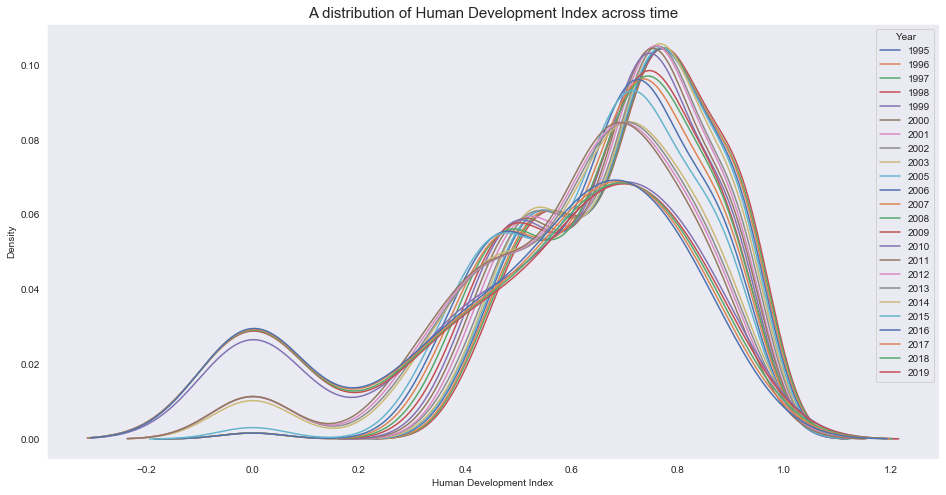

In [16]:
kdechart(df_global, "Human Development Index")

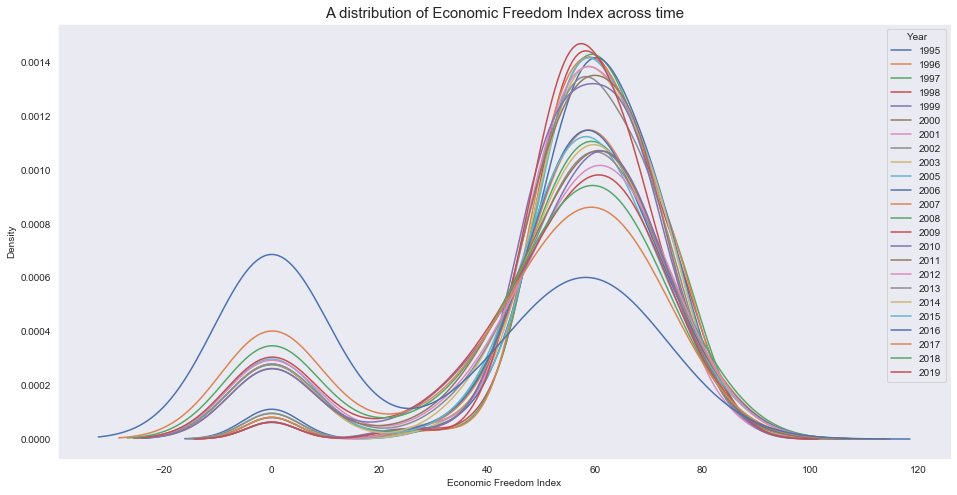

In [17]:
kdechart(df_global, "Economic Freedom Index")

### Box Plot Function

In [18]:
def boxchart(df, var1, year):
    df = df[df["Year"] == year]
    plt.figure(figsize = (16,8))
    sns.boxplot(x = "Continent",y = var1, data = df, hue = "Continent", palette = "deep")
    plt.title("How Continents differ in terms of %s during the year %d"%(var1, year))
    plt.xlabel("Continent")
    plt.ylabel(var1)
    plt.show()

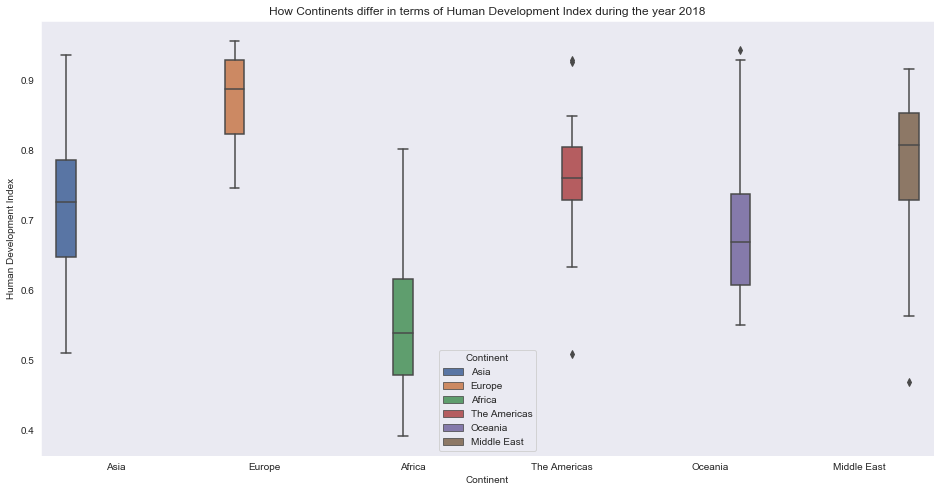

In [19]:
boxchart(df_global, "Human Development Index", 2018)

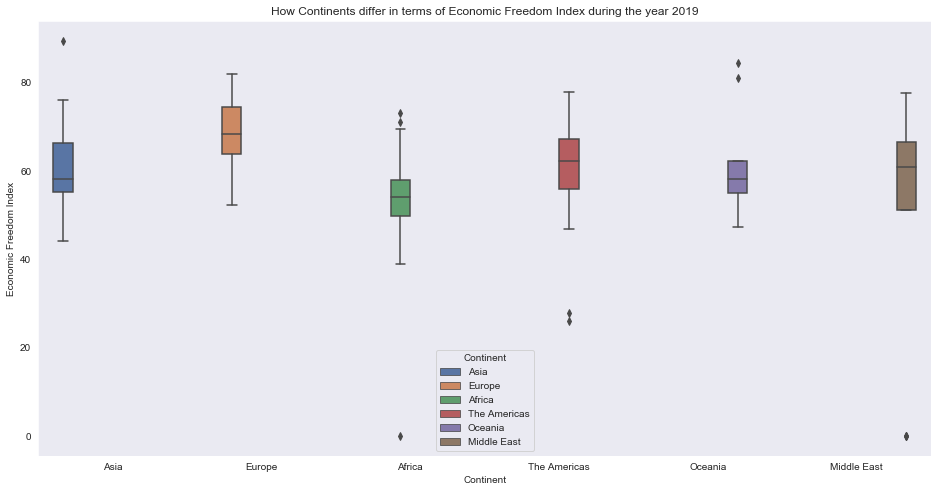

In [20]:
boxchart(df_global, "Economic Freedom Index", 2019)

### Line Plot Fucntion

In [21]:
def linechart(df, var1, country):
    df = df[df["Country"]==country]
    plt.figure(figsize = (16,8))
    sns.lineplot(x = "Year", y = var1, style = "Country", markers = "o",dashes = True, data = df)
    plt.title("%s over time in %s"%(var1,country))
    plt.xlabel("Year")
    plt.ylabel(var1)
    plt.show()

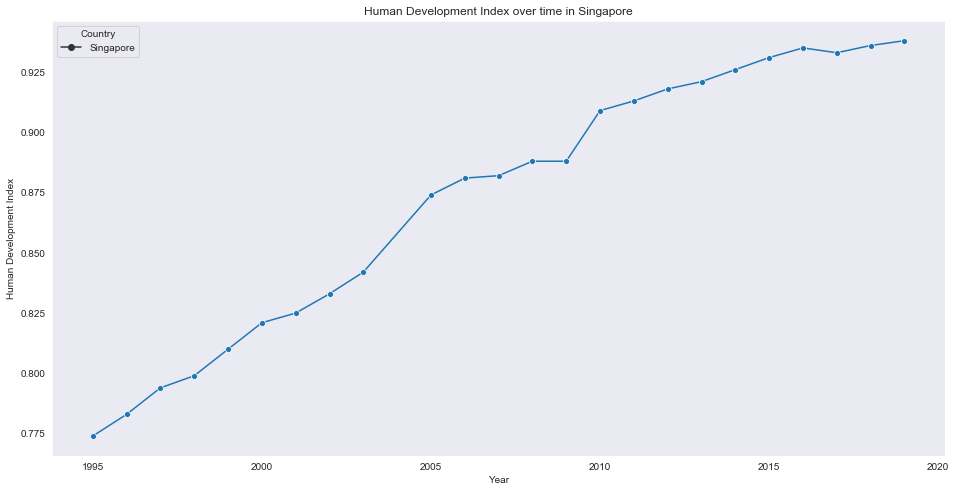

In [22]:
linechart(df_global, "Human Development Index", "Singapore")

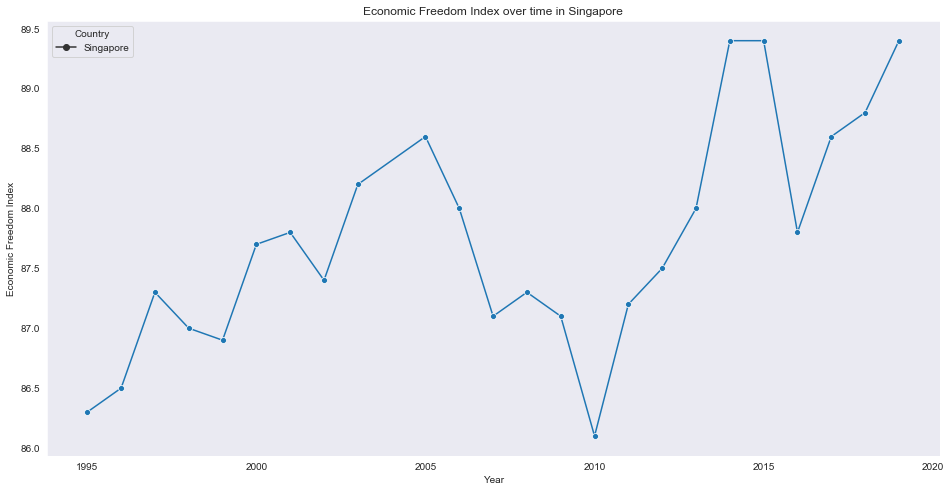

In [23]:
linechart(df_global, "Economic Freedom Index", "Singapore")